 # Creating, Inspecting, and Visualizing PyTorch Models

- **Creating Models**: Using `nn.Sequential` and custom `nn.Module` subclassing.
- **Inspecting Models**: Using `print()`, `torchinfo`, and accessing parameters/state.
- **Visualizing Model Graphs**: Using `torchviz`.

In [3]:
!pip install -q torchinfo torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.2 MB/s eta 0:00:00


In [13]:
# ==============================================================================
# 1. nn.Sequential Example
# ==============================================================================

model_seq = nn.Sequential(
    nn.Linear(in_features=INPUT_FEATURES, out_features=128),
    nn.ReLU(),
     nn.Dropout(p=0.1),
    nn.Linear(in_features=128, out_features=10)
).to(device)

# --- Inspection ---
print("--------- USING print() ---------")
print(model_seq)
print("\n")

print("--------- USING torchinfo.summary() ---------")
# Requires a sample input size (Batch, Features, ...)
print(summary(model_seq, input_size=(BATCH_SIZE, INPUT_FEATURES)))
print("\n\n")

--------- USING print() ---------
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=128, out_features=10, bias=True)
)


--------- USING torchinfo.summary() ---------
Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 10]                  --
├─Linear: 1-1                            [32, 128]                 100,480
├─ReLU: 1-2                              [32, 128]                 --
├─Dropout: 1-3                           [32, 128]                 --
├─Linear: 1-4                            [32, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 3.26
Input size (MB): 0.10
Forward/backward pass size (MB): 0.04
Params size (MB): 0.41
Estimated Total Size (MB): 0.54





## Use `nn.Sequential()`
- Pros: Concise for simple tasks
- Cons: Inflexible for complex logic

device

In [6]:
model_seq = nn.Sequential(
    nn.Linear(in_features=INPUT_FEATURES, out_features=128),
    nn.ReLU(),
    nn.Dropout(p=0.1),
    nn.Linear(in_features=128, out_features=10)
).to(device)

print(model_seq)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=128, out_features=10, bias=True)
)


## Subclassing `nn.Module`
- Define ALL layers that have trainable parameter as class attributes in the `__init__` method.
- Implement the data flow logic in the `forward()` logic.

In [14]:
# ==============================================================================
# 2. Custom nn.Module Subclass Example
# ==============================================================================
class StandardMLP(nn.Module):
    """
     A Standard Multi-Layer Perceptron, defined by subclassing nn.Module.
    """
    def __init__(self,
                 input_size: int,
                 hidden_size: int,
                 output_size: int,
                 dropout_p: float = 0.1):
      """ Defines the layers."""
      super().__init__() # VERY IMPORTANT: Call parent constructor
      self.layer_1 = nn.Linear(input_size, hidden_size)
      self.layer_2 = nn.Linear(hidden_size, output_size)
      self.dropout = nn.Dropout(dropout_p)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
       """ Defines the forward pass logic. """
       x = self.layer_1(x)
       # Can use nn.ReLU() instance, OR F.relu() functional form
       x = F.relu(x)
       x = self.dropout(x)
       x = self.layer_2(x)
       return x

# --- Instantiation ---
model_custom = StandardMLP(
    input_size=INPUT_FEATURES,
    hidden_size=128,
    output_size=10
    ).to(device)

# --- Inspection ---
print("--------- USING print() ---------")
print(model_custom)
print("\n")

print("--------- USING torchinfo.summary() ---------")
print(summary(model_custom, input_size=(BATCH_SIZE, INPUT_FEATURES)))
print("\n")

print("--------- INSPECTING State Dict Keys ---------")
# The state_dict contains all learnable parameters (weights, biases)
print(list(model_custom.state_dict().keys()))
print("\n\n")

--------- USING print() ---------
StandardMLP(
  (layer_1): Linear(in_features=784, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


--------- USING torchinfo.summary() ---------
Layer (type:depth-idx)                   Output Shape              Param #
StandardMLP                              [32, 10]                  --
├─Linear: 1-1                            [32, 128]                 100,480
├─Dropout: 1-2                           [32, 128]                 --
├─Linear: 1-3                            [32, 10]                  1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 3.26
Input size (MB): 0.10
Forward/backward pass size (MB): 0.04
Params size (MB): 0.41
Estimated Total Size (MB): 0.54


--------- INSPECTING State Dict Keys ---------
['layer_1.weight', 'layer_1.bias', 'layer_2.weight', 'layer_2.bias']





##  Building Complex Models: Composing `nn.Module`s

In [15]:
# ==============================================================================
# 3. Composing Modules Example
# ==============================================================================

class ResidualBlock(nn.Module):
    """ A simple block with a residual connection. """
    def __init__(self, dim: int, dropout_p: float = 0.1):
       super().__init__()
       self.linear_1 = nn.Linear(dim, dim)
       self.linear_2 = nn.Linear(dim, dim)
       self.dropout = nn.Dropout(dropout_p)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        y = F.relu(self.linear_1(x))
        y = self.dropout(y)
        y = self.linear_2(y)
        return x + y # The residual (skip) connection!


class ModularNet(nn.Module):
     """
     A more complex network built using a ModuleList of Blocks.
     """
     def __init__(self,
                  input_size: int,
                  hidden_size: int,
                  num_blocks: int,
                  output_size: int,
                  dropout_p: float = 0.1
                  ):
        super().__init__()
        self.input_mapper = nn.Linear(input_size, hidden_size)

        # Use nn.ModuleList to hold blocks
        self.blocks = nn.ModuleList(
            [ResidualBlock(hidden_size, dropout_p) for _ in range(num_blocks)]
         )

        self.classifier = nn.Linear(hidden_size, output_size)

     def forward(self, x: torch.Tensor) -> torch.Tensor:
         x = F.relu(self.input_mapper(x))
         for block in self.blocks: # Apply each block
             x = block(x)
         x = self.classifier(x)
         return x

# --- Instantiation ---
model_modular = ModularNet(
      input_size=INPUT_FEATURES,
      hidden_size=128,
      num_blocks=3,
      output_size=10,
      dropout_p=0.1
      ).to(device)

# --- Inspection ---
print("--------- USING print() ---------")
print(model_modular) # Note the nested structure
print("\n")

print("--------- USING torchinfo.summary() ---------")
# Use depth=2 to see more detail inside
print(summary(model_modular, input_size=(BATCH_SIZE, INPUT_FEATURES), depth=2))
print("\n\n")

--------- USING print() ---------
ModularNet(
  (input_mapper): Linear(in_features=784, out_features=128, bias=True)
  (blocks): ModuleList(
    (0-2): 3 x ResidualBlock(
      (linear_1): Linear(in_features=128, out_features=128, bias=True)
      (linear_2): Linear(in_features=128, out_features=128, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (classifier): Linear(in_features=128, out_features=10, bias=True)
)


--------- USING torchinfo.summary() ---------
Layer (type:depth-idx)                   Output Shape              Param #
ModularNet                               [32, 10]                  --
├─Linear: 1-1                            [32, 128]                 100,480
├─ModuleList: 1-2                        --                        --
│    └─ResidualBlock: 2-1                [32, 128]                 33,024
│    └─ResidualBlock: 2-2                [32, 128]                 33,024
│    └─ResidualBlock: 2-3                [32, 128]                 33,024


## Visualizing the Computation Graph (`torchviz`)

Displaying Torchviz graph (may take a moment)...


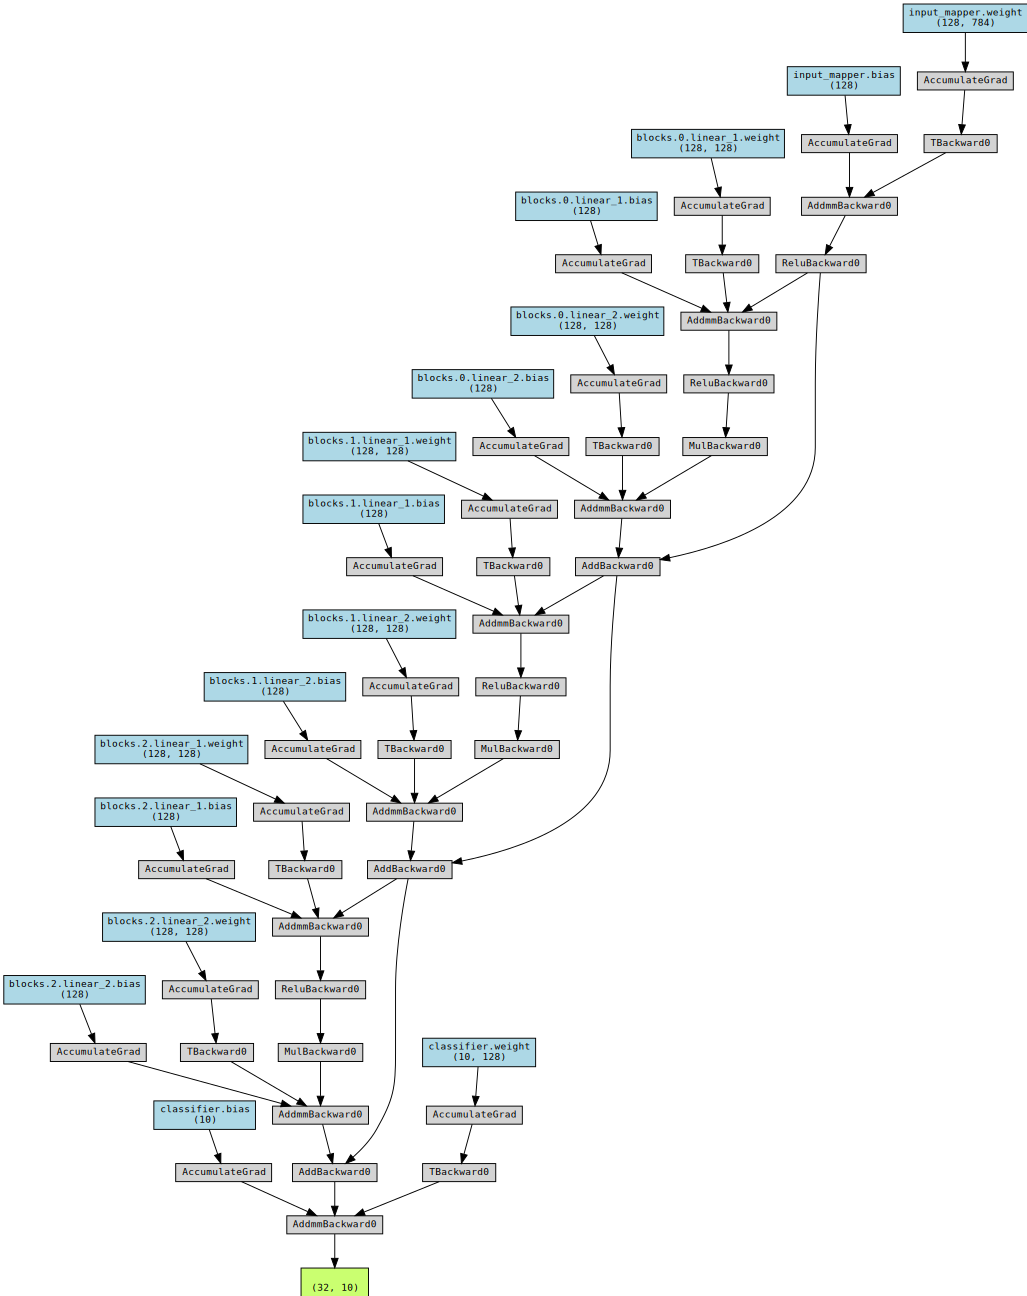

In [16]:
# ==============================================================================
# 4. Visualization using Torchviz
# ==============================================================================
# Create a dummy input tensor ON THE CORRECT DEVICE
dummy_input = torch.randn(BATCH_SIZE, INPUT_FEATURES, device=device)

# --- Generate graph for the Modular Model ---
model_modular.to(device) # Ensure model is on the right device
y = model_modular(dummy_input)

# make_dot(tensor, params)
#   tensor: The output tensor from a forward pass.
#   params: A dict of {name:-parameter} for parameters to include in graph.
viz_graph = make_dot(
    y,
    params=dict(list(model_modular.named_parameters()) + [('input', dummy_input)])
    )

# In Colab/Jupyter, this will render the graph.
# You can also save: viz_graph.render('modular_net_graph', format='png')
print("Displaying Torchviz graph (may take a moment)...")
display(viz_graph)
# Note: If you get an error, ensure graphviz is installed (see Setup cell)